# Best Signature Genes Base Mean Bug fix POC
Andrew E. Davidson  
aedavids@ucsc.edu
5/10/2023

our original extraCellularRNA/terra/jupyterNotebooks/signatureGenesUpsetPlots.ipynb did not consider baseMean when selecting "best" genes

selecting genes with a high baseMean not only is the gene statitically, it has a strong signal is more likely to be biologically sigifigant

When we run DESeq2, baseMean is the "y intercept" it represents the average value for our "control" class. It is calculated for each gene

The baseMean are log2 values


## Results
originally we filtered the PAAD 1vsAll results by 
1. padjThreshold=0.001padjThreshold < 0.001
2. abs(lfc) >= 2
3. sort by lfc in decending order
4. take the top 25 genes

the min baseMean value was 0.8754090.875409. This is basically zero. It is a bad candidate bio marker
```
	name	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
GPR119	0.875409	7.788961	0.668573	11.650121	2.291343e-31	1.930260e-29
```

**filter using baseMean**
Challenge what should the threshold be?
1. padjThreshold=0.001padjThreshold < 0.001
2. abs(lfc) >= 21. padjThreshold=0.001padjThreshold < 0.001
3. sort_values(by = ['baseMean'], ascending=False )
4. take top 25

```
        baseMean	log2FoldChange	padj
count	25.000000	25.000000	2.500000e+01
mean	11242.495073	-1.384980	4.174987e-09
std	11003.546390	3.090491	2.058237e-08
min	4496.258713	-5.580854	5.111142e-72
25%	5020.486456	-3.769981	1.040387e-32
50%	6683.641117	-2.700587	2.575289e-22
75%	9941.646224	2.069884	2.700154e-18
max	48084.270387	4.781937	1.029611e-07
```

The baseMean min/max/mean/median look impossibly high
```
max filtered by baseMean, lfc, and padj log2 base mean : 48084.2703866417
min filtered by baseMean, lfc, and padj log2 base mean : 4496.2587131842

#base 10
max filtered by baseMean, lfc, and padj base mean 5.325e+14474
min filtered by baseMean, lfc, and padj base mean 2.697e+1353
```

In [1]:
import bme263DataVis.utilities as utl
from IPython.display import display
import matplotlib
#matplotlib.use("TkAgg")
import matplotlib.pyplot as plt

import pandas as pd
# from   pathlib import Path
import pathlib as pl

imgOutDir = pl.Path("img/bestSignatureGenesBaseMeanBugFixPOC")
imgOutDir.mkdir(parents=True, exist_ok=True)

# useful function for converting plot titles to strings
# https://stackoverflow.com/a/1007615/4586180
import re
def urlify(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)

    # Replace all runs of whitespace with a single dash
    s = re.sub(r"\s+", '-', s)

    return s

# Prints: I-cant-get-no-satisfaction"
#print(urlify("I can't get no satisfaction!")

## Load old version of 'best' PAAD

In [2]:
sampleFile = 'PAAD_vs_all.results'
bugDir = '/private/groups/kimlab/GTEx_TCGA/geneSignatureProfiles/best/GTEx_TCGA_1vsAll-design:~__gender_+_category-padj:0.001-lfc:2.0-n:25'
bugDataFile = bugDir + "/" + sampleFile
#! head -n 10 $bugDataFile

orginal best 25 did filter by baseMean. Notice on of our signature genes has a log2 baseMean of 0.8. This is a weak signal. It might not be biologically signifigant

In [3]:
bugPaadDF = pd.read_csv(bugDataFile)
print(f'shape: {bugPaadDF.shape}')
display(bugPaadDF['baseMean'].describe())
bugPaadDF

shape: (25, 7)


count      25.000000
mean      317.376348
std       465.670089
min         0.875409
25%        23.095862
50%       113.019098
75%       449.723329
max      1635.162215
Name: baseMean, dtype: float64

,name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,CELA2B,1332.659848,13.266912,0.484407,27.387922,3.819727e-165,1.412612e-160
1,INS,1635.162215,12.954410,0.615054,21.062243,1.766133e-98,5.024240e-95
2,PPY,113.019098,12.417539,0.602005,20.626957,1.572377e-94,4.153547e-91
3,AL590556.3,118.401835,12.145637,0.775795,15.655739,3.035659e-55,1.069188e-52
4,GCG,470.307857,11.336948,0.601133,18.859293,2.464930e-79,3.143380e-76
5,AL034369.1,11.190628,10.542085,0.879349,11.988514,4.081605e-33,3.941147e-31
6,AL355994.3,15.664627,-10.341170,0.621975,-16.626332,4.492729e-62,2.596095e-59
7,FAM181A,73.481529,-9.748579,0.434956,-22.412769,2.954802e-111,1.424280e-107
8,ACSM2A,872.497072,-9.074979,0.505608,-17.948652,4.916893e-72,4.545913e-69
9,IAPP,36.660087,8.826670,0.673462,13.106420,3.025462e-39,4.642640e-37


In [4]:
#bugPaadDF.loc[ bugPaadDF['name' == 'GPR119'] ]
# bugPaadDF['name' == 'GPR119']
# df.loc[df['col1'] == value]

bugPaadDF.loc[ bugPaadDF['name'] == 'GPR119' ] 

,name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
15,GPR119,0.875409,7.788961,0.668573,11.650121,2.291343e-31,1.930260e-29


## explore the distribution of baseMeans. We have  74,777 genes

In [5]:
paadFile = '/private/groups/kimlab/GTEx_TCGA/1vsAll/' + sampleFile
#! head -n 10 $paadFile

paadDF = pd.read_csv(paadFile,skiprows=7)
print(f'shape: {paadDF.shape}')
display(paadDF['baseMean'].describe())
paadDF.head()

shape: (74777, 7)


count    7.477700e+04
mean     6.650956e+02
std      1.027539e+04
min      0.000000e+00
25%      5.873499e-03
50%      8.058999e-01
75%      7.021825e+01
max      1.346880e+06
Name: baseMean, dtype: float64

,name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,CELA2B,1332.659848,13.266912,0.484407,27.387922,3.819727e-165,1.412612e-160
1,ENPP3,321.790901,-5.689927,0.222926,-25.523852,1.071664e-143,1.981613e-139
2,VILL,687.481732,3.114475,0.127290,24.467473,3.279913e-132,4.043259e-128
3,POU3F3,675.194100,-8.707841,0.364690,-23.877352,5.266121e-126,4.868792e-122
4,LRP2,1211.112568,-7.771070,0.330318,-23.525996,2.211008e-122,1.635350e-118


In [6]:
# not useful paadDF['baseMean'].plot.hist(bins=50, alpha=0.5)

simply removing genes with baseMean <= 0 did not suggest what our baseMean threshold should be

In [7]:
selectNonZeroBaseMeanRows =  paadDF['baseMean'] > 0
nonZeroPAADBaseMeanDF = paadDF.loc[selectNonZeroBaseMeanRows, ['baseMean']]
nonZeroPAADBaseMeanDF.describe()

,baseMean
count,6.540600e+04
mean,7.603867e+02
std,1.098357e+04
min,1.178386e-05
25%,6.528275e-02
50%,1.981309e+00
75%,1.517969e+02
max,1.346880e+06


Try filtering on lfc and padj

In [8]:
def deprecatedFindBestSignatureGenes(deseqDF, 
                                     padjThreshold=0.001,
                                     lfcThreshold=2.0):
    '''
    Find genes that that are statistically signifigant with  lfc <= -lfcThreshold or >= lfcThreshold
    
    arguments:
        deseqDF:
            results of DESeq2 as a pandas dataframe          
            
    
    return:
        pandas dataframe
    '''    
    
    
    colsToReturn = deseqDF.columns
    
    #
    # find statistically signifigant genes
    #
    selectSignificantRowsPS = deseqDF.loc[:,"padj"] < padjThreshold
#     print("number of genes with padj < {} : {}".format(padjThreshold,
#                                                        selectSignificantRowsPS.sum()))

    #
    # use absolute value of log fold change to select best 
    # biologically signifigant genes
    # 
    significantDF = deseqDF.loc[selectSignificantRowsPS, :]
    absPS = significantDF['log2FoldChange'].abs()
    significantDF2 = significantDF.assign(absLog2FoldChange=absPS)    

    selectBestUpRegulatedRows = significantDF2.loc[:, 'absLog2FoldChange'] >= lfcThreshold
    significantDF3 = significantDF2.loc[selectBestUpRegulatedRows, :]
        
    significantDF3 = significantDF3.sort_values( by = ['absLog2FoldChange'], ascending=False)

    return significantDF3 #.loc[:, colsToReturn].head(n=signatureGeneConfig.n)


# def testDeprecatedFindBestSignatureGenes(signatureGeneConfig, candidateSignature, skipRows=7):
#     print(candidateSignature)
#     deseqDF = pd.read_csv(candidateSignature, skiprows=skipRows)
#     return deprecatedFindBestSignatureGenes(deseqDF, signatureGeneConfig)
     

# testDeprecdatedResults = testDeprecatedFindBestSignatureGenes(signatureGeneConfig, candidateSignatureFileList[0], skipRows=7)
# print("\n****** depreciated results")
# testRestestDeprecdatedResultsults

In [9]:
filteredPAAD_DF= deprecatedFindBestSignatureGenes(paadDF)
filteredPAAD_DF['baseMean'].describe()  

count     1470.000000
mean       454.279921
std       2085.620390
min          0.163672
25%          3.200487
50%         21.057466
75%        265.447146
max      48084.270387
Name: baseMean, dtype: float64

In [10]:
median = filteredPAAD_DF['baseMean'].median()
print(f'median : {median}')
def filterByBaseMean(deseqDF, baseMeanThreshold=median):
    return deseqDF.sort_values(by = ['baseMean'], ascending=False)
    
filteredBy_lfc_padj_baseMeanDF = filterByBaseMean(filteredPAAD_DF, baseMeanThreshold=median)
filteredByfilteredBy_lfc_padj_baseMeanDFTop25 = filteredBy_lfc_padj_baseMeanDF.head(n=25)
display(filteredByfilteredBy_lfc_padj_baseMeanDFTop25.loc[:, ['baseMean', 'log2FoldChange', 'padj']].describe())
filteredByfilteredBy_lfc_padj_baseMeanDFTop25

median : 21.05746601801875


,baseMean,log2FoldChange,padj
count,25.000000,25.000000,2.500000e+01
mean,11242.495073,-1.384980,4.174987e-09
std,11003.546390,3.090491,2.058237e-08
min,4496.258713,-5.580854,5.111142e-72
25%,5020.486456,-3.769981,1.040387e-32
50%,6683.641117,-2.700587,2.575289e-22
75%,9941.646224,2.069884,2.700154e-18
max,48084.270387,4.781937,1.029611e-07


,name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,absLog2FoldChange
102,KRT5,48084.270387,-5.580854,0.355234,-15.710357,1.284545e-55,4.612139e-53,5.580854
1138,KRT6A,36638.110998,-3.769981,0.394781,-9.549559,1.302500e-21,4.229065e-20,3.769981
1102,REG1A,26610.922181,4.781937,0.496257,9.636004,5.633872e-22,1.888956e-20,4.781937
31,CRYAB,21594.014674,-3.927250,0.214205,-18.334102,4.422599e-75,5.111142e-72,3.927250
2235,LYZ,17275.659268,2.271530,0.279510,8.126834,4.406469e-16,7.288015e-15,2.271530
164,ATP1A2,11623.740525,-3.823885,0.267546,-14.292452,2.438685e-46,5.465907e-44,3.823885
547,C7,9941.646224,2.580039,0.232117,11.115266,1.057354e-28,7.135593e-27,2.580039
353,FAM107A,9492.796004,-2.796470,0.229265,-12.197542,3.203469e-34,3.346630e-32,2.796470
358,PKP1,9426.533713,-3.861180,0.317742,-12.151933,5.602479e-34,5.771333e-32,3.861180
182,FABP5,7563.976967,-2.843825,0.203934,-13.944858,3.381195e-44,6.832969e-42,2.843825


/private/home/aedavids/extraCellularRNA/src/bme263DataVis/utilities.py:121: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  [leftRelativeSize, bottomRelativeSize, relativeWidth, relativeHeight] )


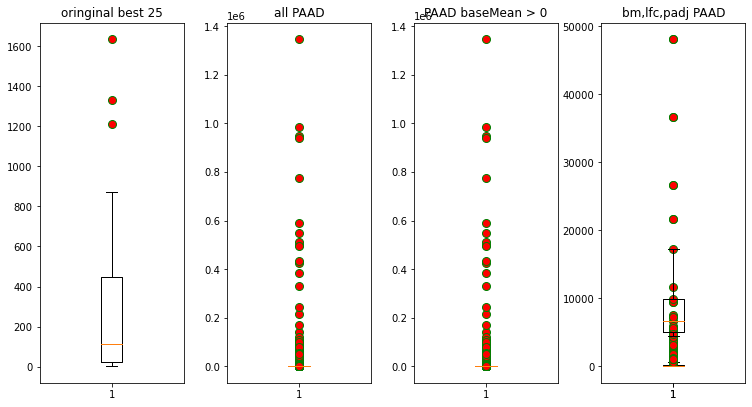

In [11]:
# box plots of stats
plotUtils =  utl.MatPlotLibUtilities()

panelWidthInInches = 2
panelHeightInInches = 5
pageWidthInInches  = panelWidthInInches * 6 + 1 
pageHeightInInches = panelHeightInInches  
fig = plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )

# oringinal best 25 did not filter by basemean
leftRelativeSize = 0
bottomRelativeSize = 0
oldBest25Panel = plotUtils.createPanel(fig, panelWidthInInches, panelHeightInInches, 
                                         leftRelativeSize, bottomRelativeSize)

# fliers are outliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')

plotDict = oldBest25Panel.boxplot( x=bugPaadDF.loc[:,'baseMean'],
                        flierprops=flierprops)
oldBest25Panel.set_title("oringinal best 25")

############################################
# all 77k PAAD baseMean
# panel 2
leftRelativeSize = 0.2 #0.40 
bottomRelativeSize = 0.0
paadDFPanel = plotUtils.createPanel(fig, panelWidthInInches, panelHeightInInches, 
                                         leftRelativeSize, bottomRelativeSize)

plotDict = paadDFPanel.boxplot( x=paadDF['baseMean'],
                        flierprops=flierprops)
paadDFPanel.set_title("all PAAD")

############################################
# PAAD baseMean > 0
# panel 3
leftRelativeSize = 0.4 #0.8
bottomRelativeSize = 0.0
paadBaseMeanGT_zeroPanel = plotUtils.createPanel(fig, panelWidthInInches, panelHeightInInches, 
                                         leftRelativeSize, bottomRelativeSize)

paadBaseMeanGT_zeroPanel.set_title("PAAD baseMean > 0")

plotDict = paadBaseMeanGT_zeroPanel.boxplot( x=nonZeroPAADBaseMeanDF.loc[:,'baseMean'],
                        flierprops=flierprops)

############################################
# filtered lfc & padj
# panel 4
leftRelativeSize = 0.6
bottomRelativeSize = 0.0
filteredPAADPanel = plotUtils.createPanel(fig, panelWidthInInches, panelHeightInInches, 
                                         leftRelativeSize, bottomRelativeSize)

filteredPAADPanel.set_title(" lfc, padj filtered PAAD")

plotDict = filteredPAADPanel.boxplot( x=filteredPAAD_DF.loc[:,'baseMean'],
                        flierprops=flierprops)

############################################
# filtered baseMean, lfc, and  padj
# panel 5
leftRelativeSize = 0.6
bottomRelativeSize = 0.0
filteredWithBaseMeanPAADPanel = plotUtils.createPanel(fig, panelWidthInInches, panelHeightInInches, 
                                         leftRelativeSize, bottomRelativeSize)

filteredWithBaseMeanPAADPanel.set_title("bm,lfc,padj PAAD")

xData = filteredByfilteredBy_lfc_padj_baseMeanDFTop25.loc[:,'baseMean']
plotDict = filteredWithBaseMeanPAADPanel.boxplot( x=xData,
                        flierprops=flierprops)


# fig.show()
# title = 'Cibersort-Training-Dataset-wisker-plot-GTEx_TCGA_1vsAlldesign__gender__categorypadj0001lfc20n25'
title = 'PAAD GTEx_TCGA baseMean'
imgFile = imgOutDir.joinpath( urlify(title) + ".png" )
plt.savefig( imgFile, bbox_inches='tight', dpi=300, facecolor="white", transparent=True )

In [12]:

tmpMax = filteredByfilteredBy_lfc_padj_baseMeanDFTop25['baseMean'].max()
tmpMin = filteredByfilteredBy_lfc_padj_baseMeanDFTop25['baseMean'].min()
print(f' max filtered by baseMean, lfc, and padj log2 base mean : {tmpMax}')
print(f' min filtered by baseMean, lfc, and padj log2 base mean : {tmpMin}')

print()
from decimal import Decimal 
print(" max filtered by baseMean, lfc, and padj base mean {:.3e}".format( Decimal(2**int(tmpMax) ) ))
print(" min filtered by baseMean, lfc, and padj base mean {:.3e}".format( Decimal(2**int(tmpMin) ) ))

# 5.325e+14474
# 2.697e+1353

 max filtered by baseMean, lfc, and padj log2 base mean : 48084.2703866417
 min filtered by baseMean, lfc, and padj log2 base mean : 4496.2587131842

 max filtered by baseMean, lfc, and padj base mean 5.325e+14474
 min filtered by baseMean, lfc, and padj base mean 2.697e+1353
